# Stock Data Analysis 

The time period we took was from 2018 to 2024. I took top 4 Stocks of NIFTY 50 ; Reliance Industries: RIL
Tata Consultancy Services (TCS): TCS , HDFC Bank: HDFCBANK, ICICI Bank: ICICIBANK. 

## Source

I took the data from Yahoo Finance using yfinance library.

## Result

We saw the worst single day return was in 2020 During COVID-19 and best single day return in 2020 due to the strong GOvernment Policies reagrding COVID-19.
After that the stocks continue to grow.

## During 2024 Lok Sabha Elections

We also done analysis of stocks during the exit polls and the result of Lok Sabha Elections of India 2024.<br>
Result : There was a short jump and short fall on the stock prices on the day of exit polls and result day respectively. But the Sensex fell 2,700 points and Nifty50 was down 809 points.

## Disclaimer

This project is intended solely for educational purposes. The analysis and visualizations provided are for the purpose of understanding historical stock market data and trends. This project is not intended for use in trading or investing, nor should it be construed as financial advice.

Furthermore, this project does not aim to comment on or influence any political or social events in the country. The data and interpretations are based on historical stock market performance and should be considered in that context alone.

Please consult with a certified financial advisor before making any investment decisions. 

## Importing the Libraries

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data, wb
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import datetime
import cufflinks as cf
cf.go_offline()

## Data

In [50]:
# Download the historical stock data

start = datetime.datetime(2018, 5, 22)
end = datetime.datetime(2024,6,30)

RIL = yf.download('RELIANCE.NS', start=start, end=end)
TCS = yf.download('TCS.NS', start=start, end=end)
HDFC = yf.download('HDFCBANK.NS', start=start, end=end)
ICICI = yf.download('ICICIBANK.NS', start=start, end=end)

# Display the first few rows of the data
HDFC.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,1647.000000,1675.099976,1645.750000,1672.400024,1672.400024,14272497
2024-06-25,1671.099976,1716.949951,1671.099976,1711.349976,1711.349976,37260774
2024-06-26,1707.949951,1710.900024,1691.099976,1701.500000,1701.500000,23798333
2024-06-27,1696.099976,1713.000000,1686.599976,1696.150024,1696.150024,27537325
2024-06-28,1697.599976,1706.599976,1679.000000,1683.800049,1683.800049,13238023


In [51]:
RIL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-22,853.209595,853.986755,845.757751,847.357849,824.808350,5655036
2018-05-23,846.672119,846.672119,831.265564,834.100037,811.903320,4995514
2018-05-24,835.700073,842.100403,832.179932,837.391602,815.107361,5816244
2018-05-25,837.528748,844.294800,836.111572,841.917542,819.512878,8891205
2018-05-28,845.666321,847.586426,839.448853,841.551819,819.156921,5684839


In [52]:
RIL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1506 entries, 2018-05-22 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1506 non-null   float64
 1   High       1506 non-null   float64
 2   Low        1506 non-null   float64
 3   Close      1506 non-null   float64
 4   Adj Close  1506 non-null   float64
 5   Volume     1506 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.4 KB


## Data Analysis

In [53]:
tickers = ['RIL', 'TCS', 'HDFC', 'ICICI']

In [54]:
bank_stocks = pd.concat([RIL, TCS, HDFC, ICICI],axis=1,keys=tickers)

In [55]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [56]:
bank_stocks.head()

Bank Ticker         RIL                                                  \
Stock Info         Open        High         Low       Close   Adj Close   
Date                                                                      
2018-05-22   853.209595  853.986755  845.757751  847.357849  824.808350   
2018-05-23   846.672119  846.672119  831.265564  834.100037  811.903320   
2018-05-24   835.700073  842.100403  832.179932  837.391602  815.107361   
2018-05-25   837.528748  844.294800  836.111572  841.917542  819.512878   
2018-05-28   845.666321  847.586426  839.448853  841.551819  819.156921   

Bank Ticker               TCS                                         ...  \
Stock Info    Volume     Open         High          Low        Close  ...   
Date                                                                  ...   
2018-05-22   5655036  1779.00  1787.474976  1746.849976  1754.449951  ...   
2018-05-23   4995514  1762.50  1772.500000  1740.500000  1747.550049  ...   
2018-05-24   5816244  1755.00  1807.500000  1751.175049  1801.849976  ...   
2018-05-25   8891205  1812.50  1837.400024  1786.275024  1792.900024  ...   
2018-05-28   5684839  1808.25  1808.250000  1743.000000  1751.025024  ...   

Bank Ticker         HDFC                                         ICICI  \
Stock Info           Low        Close   Adj Close   Volume        Open   
Date                                                                     
2018-05-22    992.750000   994.950012  941.112061  1980186  289.500000   
2018-05-23    981.700012   983.750000  930.518005  2863146  288.850006   
2018-05-24    978.174988   993.000000  939.267578  2260372  293.700012   
2018-05-25    994.950012  1004.349976  950.003357  2379794  298.399994   
2018-05-28   1003.000000  1021.099976  965.846985  2551970  293.750000   

Bank Ticker                                                            
Stock Info         High         Low       Close   Adj Close    Volume  
Date                                                                   
2018-05-22   293.850006  286.850006  290.299988  278.825409  11284988  
2018-05-23   298.399994  288.799988  292.049988  280.506256  15887229  
2018-05-24   299.000000  291.200012  297.700012  285.933014  11489424  
2018-05-25   300.950012  294.600006  295.649994  283.963989  13541580  
2018-05-28   302.299988  293.350006  299.250000  287.421692  19063427  

[5 rows x 24 columns]

In [57]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
RIL      3130.800049
TCS      4219.250000
HDFC     1728.199951
ICICI    1219.900024
dtype: float64

In [58]:
returns = pd.DataFrame()

In [59]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,RIL Return,TCS Return,HDFC Return,ICICI Return
Date,,,,
2018-05-22,NaN,NaN,NaN,NaN
2018-05-23,-0.015646,-0.003933,-0.011257,0.006028
2018-05-24,0.003946,0.031072,0.009403,0.019346
2018-05-25,0.005405,-0.004967,0.011430,-0.006886
2018-05-28,-0.000434,-0.023356,0.016677,0.012177


/Users/apsarg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



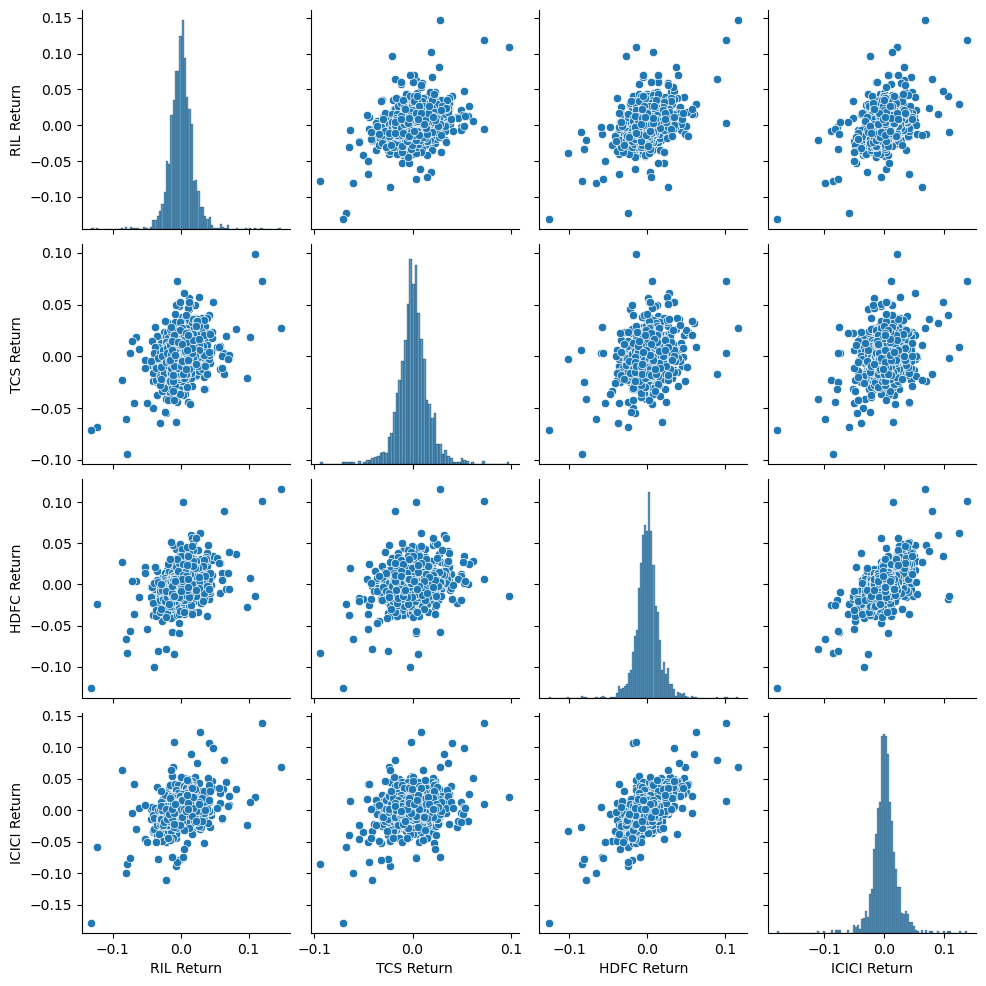

In [60]:
import seaborn as sns
sns.pairplot(returns[1:])

In [61]:
# Worst Drop (Due to COVID-19)
returns.idxmin()

RIL Return     2020-03-23
TCS Return     2020-03-12
HDFC Return    2020-03-23
ICICI Return   2020-03-23
dtype: datetime64[ns]

Indian Stock Market Crash in 2020: After making a peak of 42,273.87 points in Feb 2020, Sensex crashed over -38% by 23 March 2020 to 25,638.90 points.

In [62]:
# Best Single Day Gain
# Market rebound due to COVID-19 Policis of Government
returns.idxmax()

RIL Return     2020-03-25
TCS Return     2020-03-20
HDFC Return    2020-03-25
ICICI Return   2020-04-07
dtype: datetime64[ns]

In [63]:
# Calculate daily returns
RIL['Return'] = RIL['Adj Close'].pct_change()
TCS['Return'] = TCS['Adj Close'].pct_change()
HDFC['Return'] = HDFC['Adj Close'].pct_change()
ICICI['Return'] = ICICI['Adj Close'].pct_change()

In [64]:
best_single_day_gain = {
    'RIL Return': RIL['Return'].idxmax(),
    'TCS Return': TCS['Return'].idxmax(),
    'HDFC Return': HDFC['Return'].idxmax(),
    'ICICI Return': ICICI['Return'].idxmax()
}

best_single_day_gain

{'RIL Return': Timestamp('2020-03-25 00:00:00'),
 'TCS Return': Timestamp('2020-03-20 00:00:00'),
 'HDFC Return': Timestamp('2020-03-25 00:00:00'),
 'ICICI Return': Timestamp('2020-04-07 00:00:00')}

In [65]:
returns.std() # ICICI riskiest

RIL Return      0.018866
TCS Return      0.015429
HDFC Return     0.016336
ICICI Return    0.020184
dtype: float64

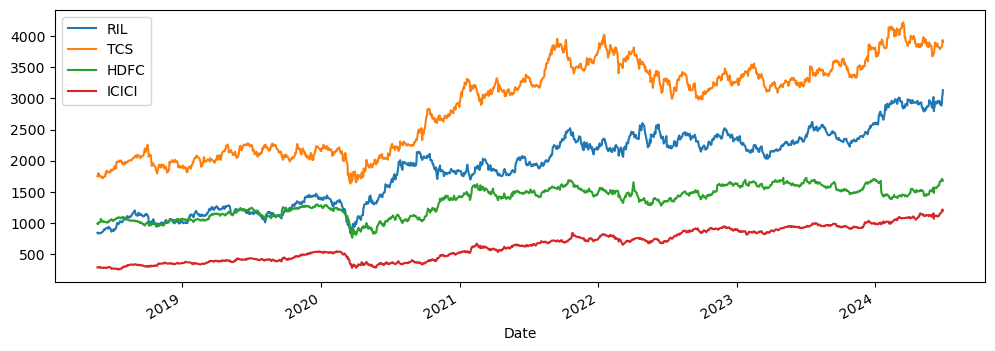

In [66]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [68]:
# Candle chart of RIL and HDFC
RIL[['Open', 'High', 'Low', 'Close']].loc['2018-01-01':'2024-06-28'].iplot(kind='candle')
HDFC[['Open', 'High', 'Low', 'Close']].loc['2018-01-01':'2024-06-28'].iplot(kind='candle')

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

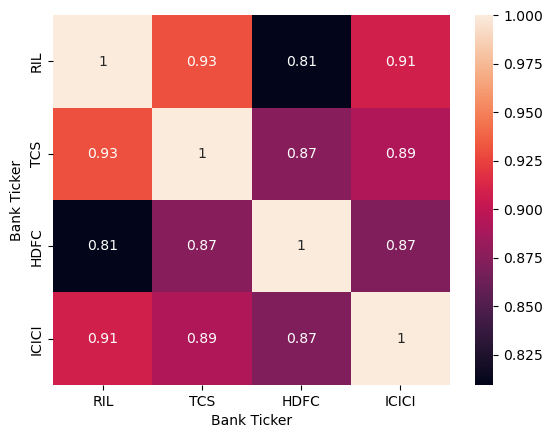

In [69]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

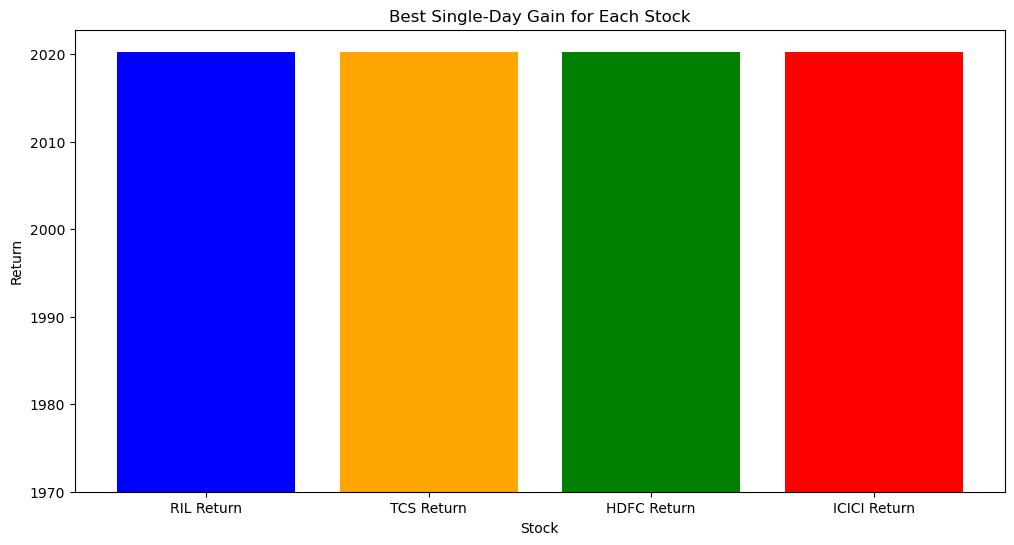

In [70]:
# Create a bar plot
# Best sigle day gain for all 4 stocks was in 2020
plt.figure(figsize=(12, 6))
plt.bar(best_single_day_gain.keys(), best_single_day_gain.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Best Single-Day Gain for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Return')
plt.show()


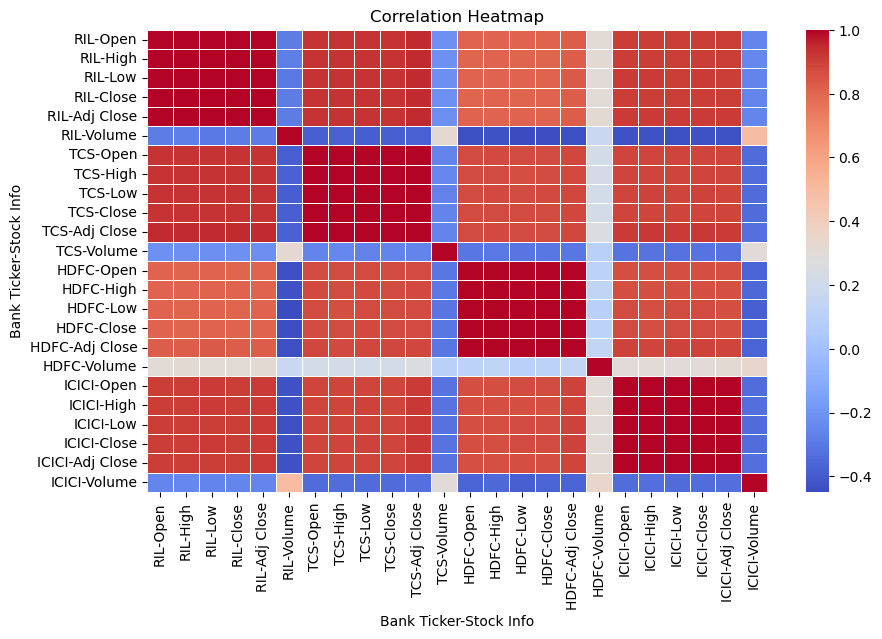

In [72]:
# Calculate correlation matrix
corr_matrix = bank_stocks.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Lok Sabha Election 2024

The 2024 Lok Sabha elections in India are scheduled to take place in seven phases from April 19 to June 1. The exit polls will be announced starting from 6:30 PM on June 1, immediately after the last phase of voting concludes. The official counting of votes will begin on June 4, 2024, and the results will be declared on the same day.

## Data

In [109]:
# Download the historical stock data

start = datetime.datetime(2024, 5, 20)
end = datetime.datetime(2024,6,8)

RIL = yf.download('RELIANCE.NS', start=start, end=end)
TCS = yf.download('TCS.NS', start=start, end=end)
HDFC = yf.download('HDFCBANK.NS', start=start, end=end)
ICICI = yf.download('ICICIBANK.NS', start=start, end=end)
ADANI = yf.download('ADANIENT.NS', start=start, end=end)

# Display the first few rows of the data
ADANI.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-21,3067.899902,3175.000000,3034.500000,3117.500000,3116.243408,3091659
2024-05-22,3129.949951,3145.000000,3073.500000,3140.949951,3139.683838,3371077
2024-05-23,3156.699951,3406.000000,3135.550049,3387.300049,3385.934570,6979082
2024-05-24,3406.000000,3457.850098,3355.600098,3384.949951,3383.585449,3473668
2024-05-27,3358.000000,3358.000000,3267.050049,3289.050049,3287.724121,2582485


In [110]:
tickers1 = ['RIL', 'TCS', 'HDFC', 'ICICI','ADANI']

In [111]:
bank_stocks1 = pd.concat([RIL, TCS, HDFC, ICICI, ADANI],axis=1,keys=tickers1)

In [112]:
bank_stocks1.columns.names = ['Bank Ticker','Stock Info']

In [113]:
bank_stocks1.head()

Bank Ticker          RIL                                                      \
Stock Info          Open         High          Low        Close    Adj Close   
Date                                                                           
2024-05-21   2851.199951  2883.649902  2851.199951  2872.250000  2872.250000   
2024-05-22   2872.550049  2937.550049  2872.550049  2921.300049  2921.300049   
2024-05-23   2917.100098  2984.449951  2910.000000  2972.100098  2972.100098   
2024-05-24   2967.250000  2977.000000  2952.199951  2960.500000  2960.500000   
2024-05-27   2960.449951  2969.800049  2923.100098  2932.500000  2932.500000   

Bank Ticker                   TCS                                         ...  \
Stock Info    Volume         Open         High          Low        Close  ...   
Date                                                                      ...   
2024-05-21   5588064  3830.600098  3844.750000  3810.050049  3820.199951  ...   
2024-05-22   5140802  3835.000000  3841.250000  3817.550049  3832.000000  ...   
2024-05-23   7304130  3840.949951  3905.000000  3825.500000  3893.449951  ...   
2024-05-24   3547388  3878.250000  3883.800049  3844.300049  3849.500000  ...   
2024-05-27   3314505  3855.000000  3908.350098  3841.350098  3847.050049  ...   

Bank Ticker        ICICI                                            ADANI  \
Stock Info           Low        Close    Adj Close    Volume         Open   
Date                                                                        
2024-05-21   1116.250000  1120.949951  1120.949951  10452900  3067.899902   
2024-05-22   1098.099976  1111.099976  1111.099976  17527411  3129.949951   
2024-05-23   1111.400024  1134.500000  1134.500000  13787687  3156.699951   
2024-05-24   1124.150024  1131.949951  1131.949951   6312670  3406.000000   
2024-05-27   1121.550049  1129.800049  1129.800049  11599857  3358.000000   

Bank Ticker                                                               
Stock Info          High          Low        Close    Adj Close   Volume  
Date                                                                      
2024-05-21   3175.000000  3034.500000  3117.500000  3116.243408  3091659  
2024-05-22   3145.000000  3073.500000  3140.949951  3139.683838  3371077  
2024-05-23   3406.000000  3135.550049  3387.300049  3385.934570  6979082  
2024-05-24   3457.850098  3355.600098  3384.949951  3383.585449  3473668  
2024-05-27   3358.000000  3267.050049  3289.050049  3287.724121  2582485  

[5 rows x 30 columns]

In [114]:
bank_stocks1.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
RIL      3020.649902
TCS      3893.949951
HDFC     1573.349976
ICICI    1160.000000
ADANI    3645.250000
dtype: float64

In [115]:
returns1 = pd.DataFrame()

In [116]:
for tick in tickers1:
    returns1[tick+' Return'] = bank_stocks1[tick]['Close'].pct_change()
returns1.head()

,RIL Return,TCS Return,HDFC Return,ICICI Return,ADANI Return
Date,,,,,
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,0.017077,0.003089,0.000274,-0.008787,0.007522
2024-05-23,0.017390,0.016036,0.022889,0.021060,0.078432
2024-05-24,-0.003903,-0.011288,0.016481,-0.002248,-0.000694
2024-05-27,-0.009458,-0.000636,0.006921,-0.001899,-0.028331


In [117]:
# Worst Drop (Result Decleration Day)
returns1.idxmin()

RIL Return     2024-06-04
TCS Return     2024-05-30
HDFC Return    2024-06-04
ICICI Return   2024-06-04
ADANI Return   2024-06-04
dtype: datetime64[ns]

In [118]:
# Best Single Day Gain
# RIL and ICICI best single day gain was on exit poll day.
returns1.idxmax()

RIL Return     2024-06-03
TCS Return     2024-06-06
HDFC Return    2024-06-05
ICICI Return   2024-06-03
ADANI Return   2024-05-23
dtype: datetime64[ns]

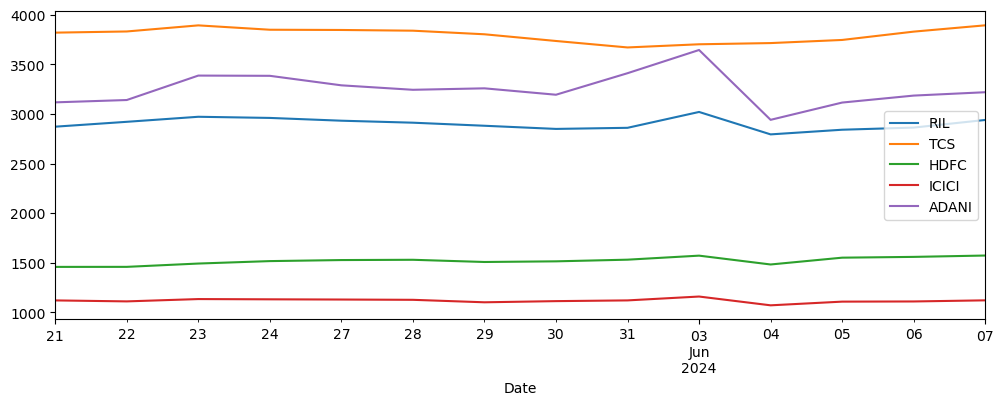

In [119]:
for tick in tickers1:
    bank_stocks1[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()